## 预测余弦函数

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#训练数据个数
train_example = 10000
test_example = 1000
example_step = 20
sample_gap = 0.01

In [3]:
def generate_data(seq):
    '''
    根据前example_step个数据 预测第example_step+1个值
    '''
    X = []
    Y = []
    for i in range(len(seq)-example_step):
        X.append(seq[i:i+example_step])
        Y.append(seq[i+example_step])
    return np.array(X,dtype = np.float32),np.array(Y,dtype=np.float32)

In [4]:
test_start = train_example*sample_gap
test_end = test_start+test_example*sample_gap

train_x,train_y = generate_data(np.cos(np.linspace(0,test_start,train_example)))
test_x,test_y = generate_data(np.cos(np.linspace(test_start,test_end,test_example)))

## 建立RNN模型

In [5]:
lstm_size = 30
lstm_layers = 2

In [6]:
x = tf.placeholder(tf.float32,[None,example_step,1],name = 'train_x')
y = tf.placeholder(tf.float32,[None,1],name='train_y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

In [7]:
lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)#包含lstm_size个单元
def lstm_cell():
    return tf.contrib.rnn.BasicLSTMCell(lstm_size)

cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(lstm_layers)])
out_puts,final_state = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)
#print(out_puts.shape)(?, 20, 30)

/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullar

/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullar

In [8]:
outputs = out_puts[:,-1]
print(outputs.shape)

(?, 30)


In [9]:
predictions = tf.contrib.layers.fully_connected(outputs,1,activation_fn=tf.tanh)
loss = tf.losses.mean_squared_error(y,predictions)
optimize = tf.train.AdamOptimizer(0.01).minimize(loss)

/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/caijie/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullar

In [10]:
def get_batch(X,Y,batch_size=64):
    for i in range(0,len(X),batch_size):
        begin_i = i
        end_i = i+batch_size if (i+batch_size)<len(X) else len(X)
        yield X[begin_i:end_i],Y[begin_i:end_i]

Epochs:0/20 Iteration:100 Train loss: 0.03453241
Epochs:1/20 Iteration:200 Train loss: 0.06298943
Epochs:1/20 Iteration:300 Train loss: 0.00865540
Epochs:2/20 Iteration:400 Train loss: 0.00278690
Epochs:3/20 Iteration:500 Train loss: 0.00031228
Epochs:3/20 Iteration:600 Train loss: 0.00249049
Epochs:4/20 Iteration:700 Train loss: 0.00068259
Epochs:5/20 Iteration:800 Train loss: 0.00325236
Epochs:5/20 Iteration:900 Train loss: 0.00146071
Epochs:6/20 Iteration:1000 Train loss: 0.00459191
Epochs:7/20 Iteration:1100 Train loss: 0.00109979
Epochs:7/20 Iteration:1200 Train loss: 0.00445862
Epochs:8/20 Iteration:1300 Train loss: 0.00084467
Epochs:8/20 Iteration:1400 Train loss: 0.00093085
Epochs:9/20 Iteration:1500 Train loss: 0.00046260
Epochs:10/20 Iteration:1600 Train loss: 0.00208654
Epochs:10/20 Iteration:1700 Train loss: 0.00159733
Epochs:11/20 Iteration:1800 Train loss: 0.00179409
Epochs:12/20 Iteration:1900 Train loss: 0.00440448
Epochs:12/20 Iteration:2000 Train loss: 0.00177832
Epoc

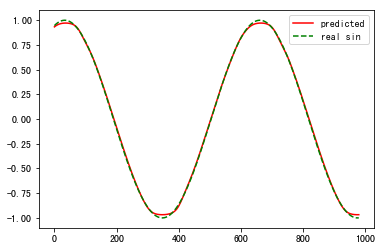

In [11]:
epoch = 20
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    it = 1
    for e in range(epoch):
        for batch_x,batch_y in get_batch(train_x,train_y):
            
            cost,_ = sess.run([loss,optimize],feed_dict={x:batch_x[:,:,None],y:batch_y[:,None],keep_prob:0.5})
            if it%100==0:
                print('Epochs:{}/{}'.format(e, epoch),
                      'Iteration:{}'.format(it),
                      'Train loss: {:.8f}'.format(cost))
            it+=1
    feed_dict = {x:test_x[:,:,None], keep_prob:1.0}
    results = sess.run(predictions, feed_dict=feed_dict)
    plt.plot(results,'r', label='predicted')
    plt.plot(test_y, 'g--', label='real sin')
    plt.legend()
    plt.show()